# Supervised Learning Models Using Spam Dataset

### Fiona Fang

## 1.  Import the spam dataset and print the first six rows.  

In [1]:
# Import python libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Read csv file
os.chdir("/Users/jiaying/Desktop/GR5073_ML/Midterm_Data_export")
df = pd.read_csv("spam_dataset.csv")


In [4]:
# List first 6 records
df.head(6)


,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


## 2. Read through the documentation of the original dataset here.

http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names

The dependent variable is "spam" where one indicates that an email is spam and zero otherwise.  Which three variables in the dataset do you think will be important predictors in a model of spam?  Why?

### Calculate the difference between the mean for each variable grouped by 'spam'.

In [5]:
# Group by the 'spam' variable and calculate the mean for each variable
means_by_spam = df.groupby('spam').mean()

# Display the mean for spam = 0 and spam = 1 
mean_table = pd.DataFrame({
    'Feature': df.columns[:-1],  # Exclude the 'spam' column
    'Mean when spam = 0': means_by_spam.iloc[0].values,
    'Mean when spam = 1': means_by_spam.iloc[1].values
})

print("Mean for spam = 0 and spam = 1:")
print(mean_table)


Mean for spam = 0 and spam = 1:
                        Feature  Mean when spam = 0  Mean when spam = 1
0               word_freq_make:            0.073479            0.152339
1            word_freq_address:            0.244466            0.164650
2                word_freq_all:            0.200581            0.403795
3                 word_freq_3d:            0.000886            0.164672
4                word_freq_our:            0.181040            0.513955
5               word_freq_over:            0.044544            0.174876
6             word_freq_remove:            0.009383            0.275405
7           word_freq_internet:            0.038415            0.208141
8              word_freq_order:            0.038049            0.170061
9               word_freq_mail:            0.167170            0.350507
10           word_freq_receive:            0.021711            0.118434
11              word_freq_will:            0.536324            0.549972
12            word_freq_people: 

In [6]:
# Calculate the difference between the mean
difference_of_means = means_by_spam.iloc[1] - means_by_spam.iloc[0]
difference_of_means_sorted = difference_of_means.sort_values(ascending=False)
print(difference_of_means_sorted)


capital_run_length_total:      309.148468
capital_run_length_longest:     86.178780
capital_run_length_average:      7.141864
word_freq_you:                   0.994199
word_freq_your:                  0.941668
word_freq_free:                  0.444775
char_freq_!:                     0.403729
word_freq_our:                   0.332915
word_freq_remove:                0.266022
word_freq_000:                   0.239967
word_freq_business:              0.239160
word_freq_email:                 0.221936
word_freq_all:                   0.203214
word_freq_credit:                0.197942
word_freq_money:                 0.195741
word_freq_font:                  0.192810
word_freq_mail:                  0.183337
word_freq_internet:              0.169727
word_freq_3d:                    0.163786
char_freq_$:                     0.162830
word_freq_order:                 0.132012
word_freq_over:                  0.130331
word_freq_addresses:             0.103762
word_freq_receive:               0

### Conclusion

Three variables in the dataset I think will be important predictors in a model of spam are 'capital_run_length_total', 'char_freq_!', and 'word_freq_free'.

1. 'capital_run_length_total': It refers to the sum of the length of uninterrupted sequences of capital letters, or the total number of capital letters in the e-mail. I chose it because, among the variables related to capital letters, it exhibits the most significant difference in mean between spam and non-spam emails. Also, spam emails might use excessive capitalization to attract attention or indicate emphasis in the email. Therefore, the total capital run length could be a feature that helps differentiate spam from non-spam emails.

2. 'char_freq_!': It represents the percentage of the character '!' in an email. Among the variables related to character frequency, it exhibits the most significant difference in mean between spam and non-spam emails. Also, the presence of exclamation marks in emails is a common characteristic of spam. Many spam messages use exclamation marks to capture attention or convey a sense of urgency. Therefore, the frequency of exclamation marks in an email (char_freq_!) could be a relevant indicator for distinguishing between spam and non-spam.

3. 'word_freq_free':This variable denotes the frequency of the word "free" in an email. Although the difference in mean of this variable is not the most notable, the word "free" is commonly used in the context of spam emails to attract attention with offers or promotions.

## 3.  Visualize the univariate distribution of each of the variables in the previous question.  

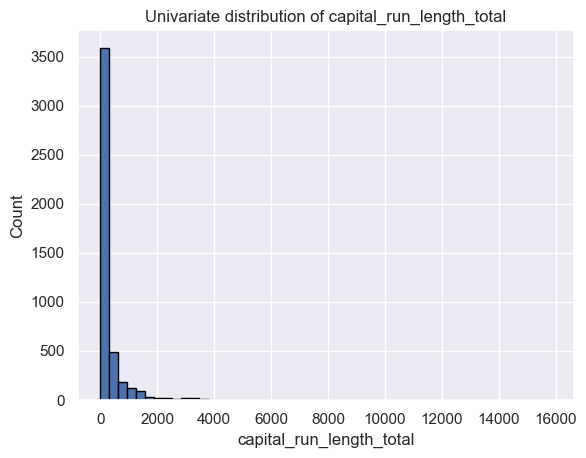

In [7]:
# Univariate distribution of capital_run_length_total
plt.hist(df['capital_run_length_total:'], bins=50, edgecolor='black')
plt.xlabel('capital_run_length_total')
plt.ylabel('Count')
plt.title('Univariate distribution of capital_run_length_total')
plt.show()


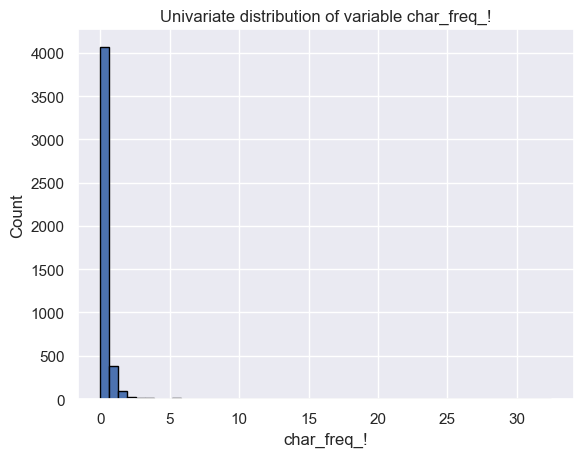

In [8]:
# Univariate distribution of char_freq_!
plt.hist(df['char_freq_!:'], bins=50, edgecolor='black')
plt.xlabel('char_freq_!')
plt.ylabel('Count')
plt.title('Univariate distribution of variable char_freq_!')
plt.show()


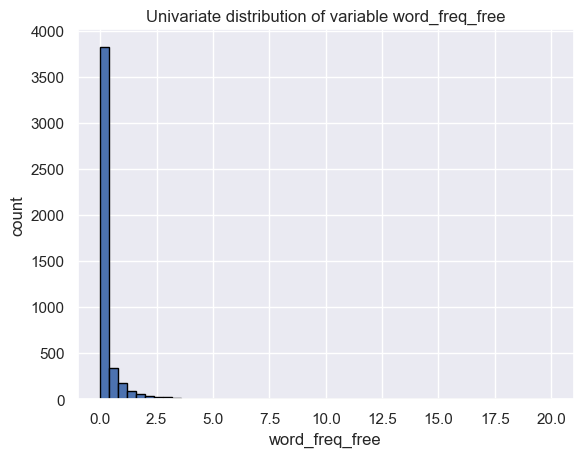

In [9]:
# Univariate distribution of word_freq_free
plt.hist(df['word_freq_free:'], bins=50, edgecolor='black')
plt.xlabel('word_freq_free')
plt.ylabel('count')
plt.title('Univariate distribution of variable word_freq_free')
plt.show()


## 4. Name each of the supervised learning models that we have learned thus far that are used to predict dependent variables like "spam".   

Spam is a binary target variable, where the values are 0 or 1. We should use
classification models.

Supervised learning models we have learned so far for the dependent variables "spam":
*   KNN for classification
*   Logistic Regression
*   Penalized Logistic Regression: L1
*   Penalized Logistic Regression: L2
*   Multinomial logistic regression model
*   Decision Tree Classification
*   Support Vector Classification (SVC)
*   Random Forest Classification
*   Bagging Classification
*   Gradient Boosting Classification

## 5. Describe the importance of training and test data.  Why do we separate data into these subsets?


Training data is a set of examples the model uses to understand patterns, relationships, and features. The primary purpose of training data is to teach the algorithm the patterns and relationships in the data. The algorithm learns from the features and corresponding labels (for supervised learning) in the training set.

The test data, on the other hand, is used to evaluate the model's understanding. The test data is used to evaluate how well the trained model generalizes to new, unseen data. It simulates the real-world scenario where the model encounters data it hasn't seen before.

Therefore, the importance of training and test data is that training data is the foundation (the model learns from it). Test data is the reality check, ensuring that the model can apply its learning to new situations. We can use training and test data to find the model, reveal how well the model perform, use test data as a reality check to prevent overfitting, and tune parameters of the model.

After we separate data into subsets, during the training phase, the algorithm can store or memorize the training data. The trained model should be capable of making predictions on new, unseen data points based on the patterns it learned from the training set.

Then, the model makes predictions on the test data, and the predictions are compared with the actual labels or values in the test set. The performance metrics, such as accuracy or mean squared error, are calculated based on the model's predictions on the test set. These metrics provide an indication of how well the model is likely to perform on new, unseen data.

In conclusion, we separate data into these subsets because we want to simulate the real-world scenario. Also, we can have an unbiased evaluation of the model because we can use it on test data to test the model performance. 

## 6. What is k-fold cross validation and what do we use it for?

K-fold cross-validation is a technique used in machine learning to assess the performance and generalizability of a model. It wants to use as much data as possible to learn about how well the model does to predict. The basic idea is to divide the dataset into K subsets, or folds. The model is trained and evaluated K times, each time using a different fold as the test set and the remaining folds as the training set. The performance metric (such as accuracy) is measured for each iteration. The performance metrics from all iterations are averaged to provide a robust estimation of the model's performance.

We use it for estimating the model's performance, detecting overfitting or underfitting, maximizing the data usage, and reducing variance in the performance metrics. 

## 7. How is k-fold cross validation different from stratified k-fold cross validation?

Stratified K-fold cross-validation is a technique used for model evaluation that takes into account the distribution of classes in the dataset. The dataset is divided into K subsets or folds. Unlike standard K-fold cross-validation, the division is done in a way that preserves the proportion of each class in every fold. So for each fold, the distribution of classes is maintained to be similar to the overall dataset. The model is trained and evaluated K times, with each fold serving as the test set exactly once.

Both K-fold cross-validation and stratified K-fold cross-validation are techniques used for model evaluation, but they differ in some ways. 

(1) StratifiedKFold is designed for classification tasks where the target variable is categorical. For regression problems where the target variable is continuous, using KFold or RepeatedKFold would be more appropriate.

(2) K-Fold is a cross-validator that divides the dataset into k folds. It does not consider the class distribution. Stratified K-Fold is to ensure that each fold of dataset has the same proportion of observations with a given label. It ensures that each fold maintains a similar class distribution to the overall dataset

(3) K-Fold may not be suitable for imbalanced datasets. Stratified K-Fold deals with imbalanced datasets where some classes have significantly fewer samples than others.

## 8. Choose one model from question four.  Split the data into training and test subsets.  Build a model with the three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k).  Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  

In [10]:
# Change variable names to X, y to create train/test split
y = df['spam']
X = df[['char_freq_!:', 'capital_run_length_total:', 'word_freq_free:']]

print(y[0:5])
X.head(5)


0    1
1    1
2    1
3    1
4    1
Name: spam, dtype: int64


,char_freq_!:,capital_run_length_total:,word_freq_free:
0,0.778,278,0.32
1,0.372,1028,0.14
2,0.276,2259,0.06
3,0.137,191,0.31
4,0.135,191,0.31


In [11]:
#Set up training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head(5)


,char_freq_!:,capital_run_length_total:,word_freq_free:
1173,1.939,40,1.23
1954,0.000,74,0.00
256,0.931,217,0.00
3341,0.014,1223,0.14
4469,0.000,3,0.00


### First, I choose the logistic regression model.

In [12]:
# Create a logistic regression model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty=None)
logreg.fit(X_train, y_train)


LogisticRegression(penalty=None)

For this model, no penalty is added. I use GridSearchCV to find the best set of parameters for this model.

In [13]:
# Tune the paramter
param_grid1 = {'C': [0.001, 0.01, 0.1, 1, 10, 100], "penalty":["none"]}

grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid1)
grid_search.fit(X_train, y_train)

best_params1 = grid_search.best_params_
print("best parameters: {}".format(grid_search.best_params_))

best parameters: {'C': 0.001, 'penalty': 'none'}


Thus, for parameters, I use C=0.001 in the model.

In [14]:
logreg = LogisticRegression(C=0.001, penalty=None).fit(X_train, y_train)

# Evaluate prediction error on test data directly
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

predicted_vals = logreg.predict(X_test)
print("logreg.predict: {}".format(predicted_vals))
test_accuracy = accuracy_score(y_test, predicted_vals)
print(f"Test Accuracy: {test_accuracy:.3f}")


Training set score: 0.778
Test set score: 0.769
logreg.predict: [0 1 0 ... 1 0 0]
Test Accuracy: 0.769


In [15]:
# Evaluate prediction error using k-fold cross-validation
kfold1 = KFold()
print("Cross validation Accuracy:{:.3f}".format(np.mean(
    cross_val_score(logreg, X_train, y_train, cv=kfold1))))


Cross validation Accuracy:0.776


## 9. Choose a second model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k).  Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous model?

### Second, I choose the random forest classification model.

In [16]:
# Create a Random Forest model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


RandomForestClassifier()

I use GridSearchCV to find the best set of parameters for this model.

In [17]:
# Tune the parameter
param_grid2 = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid2, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

best_params2 = grid_search.best_params_
print("best parameters: {}".format(grid_search.best_params_))

best parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


Thus, I use these best parameters in my random forest classification model.

In [18]:
rf_model = RandomForestClassifier(**best_params2)
rf_model.fit(X_train, y_train)

# Evaluate prediction error on test data directly
print("Training set score: {:.3f}".format(rf_model.score(X_train, y_train)))
print("Test set score: {:.3f}".format(rf_model.score(X_test, y_test)))

predicted_vals = rf_model.predict(X_test)
print("rf.predict: {}".format(predicted_vals))
test_accuracy = accuracy_score(y_test, predicted_vals)
print(f"Test Accuracy: {test_accuracy:.3f}")


Training set score: 0.932
Test set score: 0.867
rf.predict: [0 0 0 ... 1 0 0]
Test Accuracy: 0.867


In [19]:
# Evaluate prediction error using k-fold cross-validation
kfold2 = KFold()
print("Cross validation Accuracy:{:.3f}".format(np.mean(
    cross_val_score(rf_model, X_train, y_train, cv=kfold2))))


Cross validation Accuracy:0.863


This model predicts test data better than the logistic regression model. The test score increases from 0.769 to 0.867, and the cross validation accuracy increases from 0.776 to 0.863.

## 10. Choose a third model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous models?


### Third, I choose KNN for classification.

In [20]:
# Create a KNN Classification model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


KNeighborsClassifier()

I use GridSearchCV to find the best set of parameters for this model.

In [21]:
# Tune the parameter
np.arange(1, 15, 2)
param_grid3 = {'n_neighbors': [1,3,5,7,9,10,11,13] }

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid3, cv=10)
grid.fit(X_train, y_train)

best_params3 = grid_search.best_params_
print("best parameters: {}".format(grid.best_params_))


best parameters: {'n_neighbors': 3}


Thus, for parameters of the model, I use n_neighbors = 3 in my model.

In [22]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Evaluate prediction error on test data directly
print("Training set score: {:.3f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.3f}".format(knn.score(X_test, y_test)))
print("best score: {:.3f}".format(grid.best_score_))

predicted_vals = knn.predict(X_test)
print("knn.predict: {}".format(predicted_vals))
test_accuracy = accuracy_score(y_test, predicted_vals)
print(f"Test Accuracy: {test_accuracy:.3f}")


Training set score: 0.863
Test set score: 0.743
best score: 0.760
knn.predict: [0 0 0 ... 1 0 1]
Test Accuracy: 0.743


In [23]:
# Evaluate prediction error using k-fold cross-validation
kfold3 = KFold()
print("Cross validation Accuracy:{:.3f}".format(np.mean(
    cross_val_score(knn, X_train, y_train, cv=kfold3))))


Cross validation Accuracy:0.754


This model does not predict test data better than the previous models. The test score is 0.743, while the test score of logistic regression model is 0.769 and the test score of random forest classification model is 0.867. The cross validation accuracy is 0.754, while the cross validation accuracy  of logistic regression model is 0.776 and the cross validation accuracy  of random forest classification model is 0.863.

## 11. Choose a fourth model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation. Evaluate prediction error, did this model predict better than your previous models?

### Finally, I choose decision tree model.

In [24]:
# Create a decision tree model
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X,y)


DecisionTreeClassifier()

I use GridSearchCV to find the best set of parameters for this model.

In [25]:
# Tune the paramter
param_grid4 = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=tree, param_grid=param_grid4, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params4 = grid_search.best_params_
print("best parameters: {}".format(grid_search.best_params_))


best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


Thus, I use these best parameters for my model.

In [26]:
tree = DecisionTreeClassifier(**best_params4)
tree.fit(X_train, y_train)

# Evaluate prediction error on test data directly
print("Training set score: {:.3f}".format(tree.score(X_train, y_train)))
print("Test set score: {:.3f}".format(tree.score(X_test, y_test)))

predicted_vals = tree.predict(X_test)
print("tree.predict: {}".format(predicted_vals))
test_accuracy = accuracy_score(y_test, predicted_vals)
print(f"Test Accuracy: {test_accuracy:.3f}")


Training set score: 0.899
Test set score: 0.857
tree.predict: [0 0 0 ... 1 0 0]
Test Accuracy: 0.857


In [27]:
# Evaluate prediction error using k-fold cross-validation
kfold4 = KFold()
print("Cross validation Accuracy:{:.3f}".format(np.mean(
    cross_val_score(tree, X_train, y_train, cv=kfold4))))


Cross validation Accuracy:0.851


This model performs better than the logistic regression model and the KNN for classification model, but the model does not predict test data better than the random forest classification model. 

The test score of KNN classification model is 0.743, the test score of logistic regression model is 0.769, and the test score of random forest classification model is 0.867. The test score of decision tree classification model is 0.857, which is bigger than that of KNN classification and logistic regression model, but smaller than that of random forest classification model. 

The cross validation accuracyof KNN classification model is 0.754, the cross validation accuracy of logistic regression model is 0.776, and the cross validation accuracy of random forest classification model is 0.863. The cross validation accuracy of decision tree classification model is 0.851, which is bigger than that of KNN classification and logistic regression model, but smaller than that of random forest classification model. 

## 12. Now rerun your best model from questions 8 through 11, but this time add three new variables to the model that you think will increase prediction accuracy.   Did this model predict test data better than your previous models?  

Based on previous analysis, my best model is the random forest classification model.

I add three new variables: 'word_freq_remove', 'char_freq_$', 'word_freq_business:'.

In [28]:
y2 = df['spam']
X2 = df[['char_freq_!:', 'capital_run_length_total:', 'word_freq_free:',
        'word_freq_remove:', 'char_freq_$:', 'word_freq_business:']]

print(y2[0:5])
X2.head(5)


0    1
1    1
2    1
3    1
4    1
Name: spam, dtype: int64


,char_freq_!:,capital_run_length_total:,word_freq_free:,word_freq_remove:,char_freq_$:,word_freq_business:
0,0.778,278,0.32,0.00,0.000,0.00
1,0.372,1028,0.14,0.21,0.180,0.07
2,0.276,2259,0.06,0.19,0.184,0.06
3,0.137,191,0.31,0.31,0.000,0.00
4,0.135,191,0.31,0.31,0.000,0.00


In [29]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=42)
X_train2.head(5)


,char_freq_!:,capital_run_length_total:,word_freq_free:,word_freq_remove:,char_freq_$:,word_freq_business:
1173,1.939,40,1.23,1.23,0.000,0.00
1954,0.000,74,0.00,0.00,0.000,0.00
256,0.931,217,0.00,0.00,0.000,2.85
3341,0.014,1223,0.14,0.00,0.044,0.19
4469,0.000,3,0.00,0.00,0.000,0.00


In [30]:
rf_model_new = RandomForestClassifier(**best_params2)
rf_model_new.fit(X_train2, y_train2)

# Evaluate prediction error on test data directly
print("Training set score: {:.3f}".format(rf_model_new.score(X_train2, y_train2)))
print("Test set score: {:.3f}".format(rf_model_new.score(X_test2, y_test2)))

predicted_vals = rf_model_new.predict(X_test2)
print("rf.predict: {}".format(predicted_vals))
test_accuracy = accuracy_score(y_test2, predicted_vals)
print(f"Test Accuracy: {test_accuracy:.3f}")


Training set score: 0.952
Test set score: 0.904
rf.predict: [0 0 0 ... 1 0 1]
Test Accuracy: 0.904


In [31]:
# Evaluate prediction error using k-fold cross-validation
kfold5 = KFold()
print("Cross validation Accuracy:{:.3f}".format(np.mean(
    cross_val_score(rf_model_new, X_train2, y_train2, cv=kfold5))))


Cross validation Accuracy:0.913


This model performs bettter than all of my previous models. Compared with the random forest classification model using 3 variables, the test score increases from 0.867 to 0.904, and the cross validation accuracy increases from 0.863 to 0.913.

## 13. Rerun all your other models with this final set of six variables, evaluate prediction error, and choose a final model.  Why did you select this model among all of the models that you ran?  

### Logistic regression model:

In [32]:
logreg_new = LogisticRegression(**best_params1).fit(X_train2, y_train2)

# Evaluate prediction error on test data directly
print("Training set score: {:.3f}".format(logreg_new.score(X_train2, y_train2)))
print("Test set score: {:.3f}".format(logreg_new.score(X_test2, y_test2)))

predicted_vals = logreg_new.predict(X_test2)
print("logreg.predict: {}".format(predicted_vals))
test_accuracy = accuracy_score(y_test2, predicted_vals)
print(f"Test Accuracy: {test_accuracy:.3f}")


Training set score: 0.855
Test set score: 0.845
logreg.predict: [0 0 0 ... 1 0 1]
Test Accuracy: 0.845


In [33]:
# Evaluate prediction error using k-fold cross-validation
kfold6 = KFold()
print("Cross validation Accuracy:{:.3f}".format(np.mean(
    cross_val_score(logreg_new, X_train2, y_train2, cv=kfold6))))


Cross validation Accuracy:0.859


### KNN for classification:

In [34]:
knn_new = KNeighborsClassifier(n_neighbors=3)
knn_new.fit(X_train2, y_train2)

# Evaluate prediction error on test data directly
print("Training set score: {:.3f}".format(knn_new.score(X_train2, y_train2)))
print("Test set score: {:.3f}".format(knn_new.score(X_test2, y_test2)))
print("best score: {:.3f}".format(grid.best_score_))

predicted_vals = knn_new.predict(X_test2)
print("knn.predict: {}".format(predicted_vals))
test_accuracy = accuracy_score(y_test2, predicted_vals)
print(f"Test Accuracy: {test_accuracy:.3f}")


Training set score: 0.880
Test set score: 0.759
best score: 0.760
knn.predict: [0 1 0 ... 1 0 1]
Test Accuracy: 0.759


In [35]:
# Evaluate prediction error using k-fold cross-validation
kfold7 = KFold()
print("Cross validation Accuracy:{:.3f}".format(np.mean(
    cross_val_score(knn_new, X_train2, y_train2, cv=kfold7))))


Cross validation Accuracy:0.772


### Decision tree classification:

In [36]:
tree_new = DecisionTreeClassifier(**best_params4)
tree_new.fit(X_train2, y_train2)

# Evaluate prediction error on test data directly
print("Training set score: {:.3f}".format(tree_new.score(X_train2, y_train2)))
print("Test set score: {:.3f}".format(tree_new.score(X_test2, y_test2)))

predicted_vals = tree_new.predict(X_test2)
print("tree.predict: {}".format(predicted_vals))
test_accuracy = accuracy_score(y_test2, predicted_vals)
print(f"Test Accuracy: {test_accuracy:.3f}")


Training set score: 0.931
Test set score: 0.879
tree.predict: [0 0 0 ... 1 0 1]
Test Accuracy: 0.879


In [37]:
# Evaluate prediction error using k-fold cross-validation
kfold8 = KFold()
print("Cross validation Accuracy:{:.3f}".format(np.mean(
    cross_val_score(tree_new, X_train2, y_train2, cv=kfold8))))


Cross validation Accuracy:0.898


I will choose random forest classification model. When using 6 variables, this model performs the best in terms of the test score and cross validation accuracy. The test score is 0.904, and the cross validation accuracy is 0.913. When using the 3 variables, it also performs the best. 

## 14. What variable that currently is not in your model, if included, would be likely to increase your final model's predictive power?  For this answer try to speculate about a variable outside the variables available in the data that would improve your model.

Variable: The sender's email address

The sender's email address may be a key identifier. Legitimate emails often come from known and verified sources, such as known businesses or contacts. In contrast, spam emails may use fake or suspicious email addresses.

By including sender information, the model can learn to distinguish between trusted sources and potential spammers. For example, if an email address is associated with previous emails of spam, it might be indicative of future spam.

## 15. Lastly, you have listed each of the models that we have learned to use to predict dependent variables like spam.  List each model we have focused on in class thus far that you could use to evaluate data with a continuous dependent variable.

*   Linear Regression
*   Decision Trees for Regression
*   Random Forest for Regression
*   Support Vector Machines (SVM) for Regression
*   K-Nearest Neighbors (KNN) for Regression
*   Gradient Boosting Models for Regression 
*   Bagging (Regression)
*   Lasso Regression
*   Ridge Regression